<a href="https://colab.research.google.com/github/Diogo-Cardeal/PyTorch-for-DL-ML/blob/main/02_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2. Neural Network Classification


In [ ]:
import sklearn


In [ ]:
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)



In [ ]:
#make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


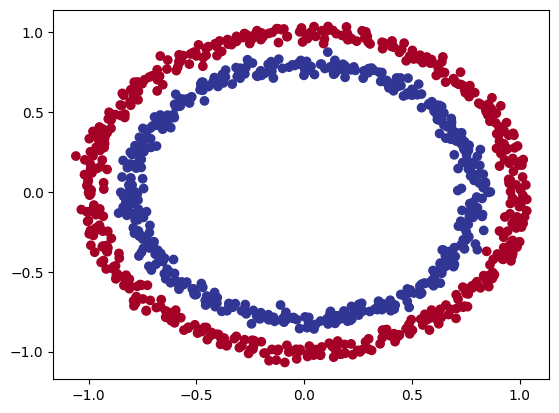

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);


**NOTE**: The dataset beeing used is often referred to as toy dataset , a dtaset that is small enough to practice with but still sizeble enoughto practice the fundamentals

In [ ]:
# View the first example of features and labels

x_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {x_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {x_sample.shape} and the same for y: {y_sample.shape}")


Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [ ]:
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
#Turn data into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
#Split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## Building a model

1. Setup device agnostic code so our code will run on an accelerator gpu if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Creat training and test loop

In [ ]:
# Import torch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#1. Creating a model
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Creat 2 nn.linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=10) # Takes in 2 features and upscale to 5 features
    self.layer_2 = nn.Linear(in_features=10, out_features=10) # Takes in 5 features from previous layer and outputs a single feature (same shape as y)
    self.layer_3 = nn.Linear(in_features=10, out_features=1) # added layer in order to improve model

#3. Define a Forward method that outlines the forward pass
def forward(self, x):
  return self.layer_2(self.layer_1(x)) #x -> layer 1 -> layer 2 -> output

#4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Using nn.Sequential(), easier to build when NN is simple
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3041, -0.0775],
                      [-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.1554,  0.0910, -0.6231,  0.2968, -0.1061], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2049,  0.3841,  0.0997, -0.2474, -0.2264]], device='cuda:0')),
             ('1.bias', tensor([-0.0214], device='cuda:0'))])

In [ ]:
# Make some predictions
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test sample: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Lenght of test sample: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[ 0.0004],
        [-0.0377],
        [-0.0430],
        [ 0.0133],
        [-0.2707],
        [-0.2922],
        [-0.2191],
        [-0.2793],
        [-0.0333],
        [-0.0428]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### Setup a loss function and optimizer


In [ ]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss -> Sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does not our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


In [ ]:
# View the first 5 outputs of the foward passs on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0004],
        [-0.0377],
        [-0.0430],
        [ 0.0133],
        [-0.2707]], device='cuda:0')

### Activation func


In [ ]:
# Use the sigmoid activation function on our model logits to turn them into predictions
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5001],
        [0.4906],
        [0.4893],
        [0.5033],
        [0.4327]], device='cuda:0')

In [ ]:
torch.round(y_pred_probs)

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0')

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of the extra layer
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 0., 0., 1., 0.], device='cuda:0')

### Train the model


In [ ]:
# Training and test loop
torch.manual_seed(42)

# Set the number of epochs
epochs = 500

# Device agnostic code
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Build train and eval loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  #1. Foward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probs -> pred labels

  #2. Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    #1. Fowardpass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate test loss / acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                      y_pred=test_pred)

    # Print out what is happenin
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, {acc:.2f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69713, 46.75, Acc: 46.75% | Test loss: 0.69687, Test acc: 43.50%
Epoch: 10 | Loss: 0.69504, 48.50, Acc: 48.50% | Test loss: 0.69495, Test acc: 46.50%
Epoch: 20 | Loss: 0.69416, 49.38, Acc: 49.38% | Test loss: 0.69412, Test acc: 44.50%
Epoch: 30 | Loss: 0.69375, 50.00, Acc: 50.00% | Test loss: 0.69372, Test acc: 46.50%
Epoch: 40 | Loss: 0.69355, 50.38, Acc: 50.38% | Test loss: 0.69353, Test acc: 47.00%
Epoch: 50 | Loss: 0.69343, 50.38, Acc: 50.38% | Test loss: 0.69342, Test acc: 50.50%
Epoch: 60 | Loss: 0.69336, 49.75, Acc: 49.75% | Test loss: 0.69337, Test acc: 50.50%
Epoch: 70 | Loss: 0.69330, 50.00, Acc: 50.00% | Test loss: 0.69335, Test acc: 52.50%
Epoch: 80 | Loss: 0.69326, 49.50, Acc: 49.50% | Test loss: 0.69335, Test acc: 55.00%
Epoch: 90 | Loss: 0.69323, 49.25, Acc: 49.25% | Test loss: 0.69336, Test acc: 53.00%
Epoch: 100 | Loss: 0.69320, 50.12, Acc: 50.12% | Test loss: 0.69338, Test acc: 53.50%
Epoch: 110 | Loss: 0.69317, 49.88, Acc: 49.88% | Test loss: 0.693

### Make predictions and evaluate the model


In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary

Download helper_functions.py


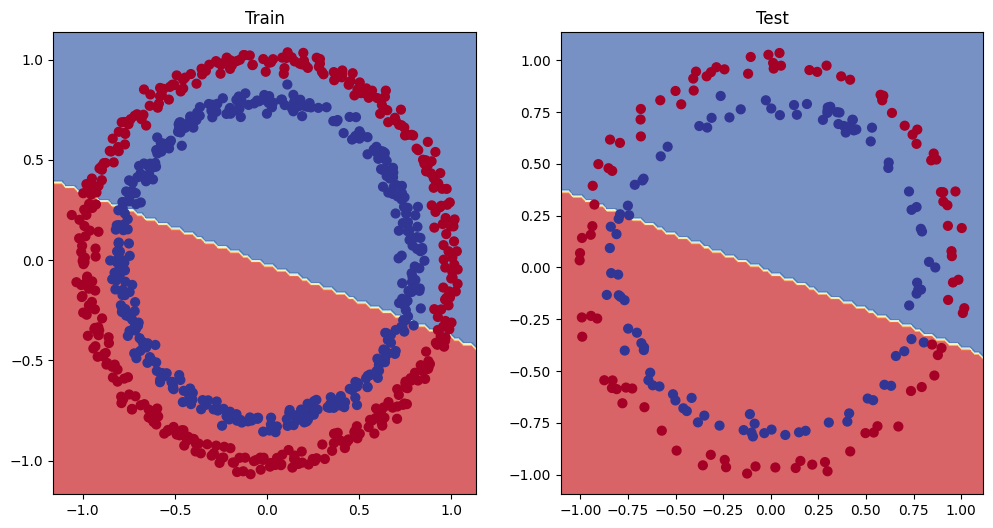

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0,X_test, y_test)


In [ ]:
model_0.state_dict()


OrderedDict([('0.weight',
              tensor([[-0.3491, -0.0951],
                      [-0.4611,  0.6677],
                      [-0.5138,  0.3780],
                      [ 0.2079,  0.2165],
                      [-0.4332,  0.6235]])),
             ('0.bias', tensor([ 0.1468,  0.1077, -0.6193,  0.2861, -0.1162])),
             ('1.weight',
              tensor([[-0.2679,  0.3382, -0.0012, -0.1746, -0.2659]])),
             ('1.bias', tensor([0.0223]))])

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    nn.ReLU()
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Device agnostic code
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


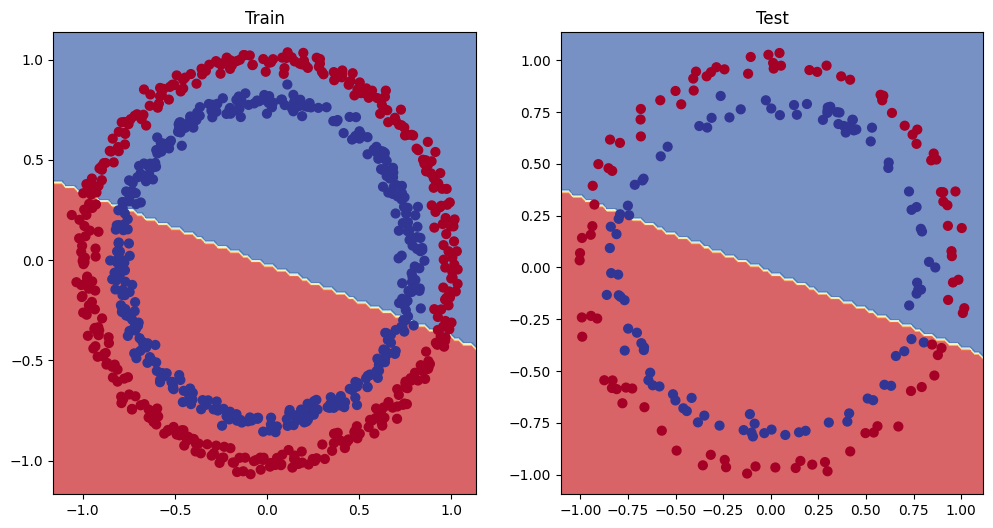

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0,X_test, y_test)

###Non-Linear Model


In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.layer_1 =  nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.Relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.Relu(self.layer_2(self.Relu(self.layer_1(x)))))

model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (Relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Device agnostic code
X_test, y_test = X_test.to(device), y_test.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)

# Train the model
epochs = 2000

for epoch in range(epochs):
  model_2.train()

  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # print what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test loss: 0.69319, Test acc: 50.00%
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test loss: 0.69102, Test acc: 52.50%
Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test loss: 0.68940, Test acc: 55.00%
Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test loss: 0.68723, Test acc: 56.00%
Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test loss: 0.68411, Test acc: 56.50%
Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test loss: 0.67941, Test acc: 56.50%
Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test loss: 0.67285, Test acc: 56.00%
Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test loss: 0.66322, Test acc: 59.00%
Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test loss: 0.64757, Test acc: 67.50%
Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test loss: 0.62145, Test acc: 79.00%
Epoch: 1000 | Loss: 0.56818, Acc: 87.75% | Test loss: 0.57378, Test acc: 86.50%
Epoch: 1100 | Loss: 0.48153, Acc: 93.50% | Test loss: 0.49935, Test acc: 90.50%
Epoch: 1200 | Loss: 0.37056, Acc: 97.75% | Test loss

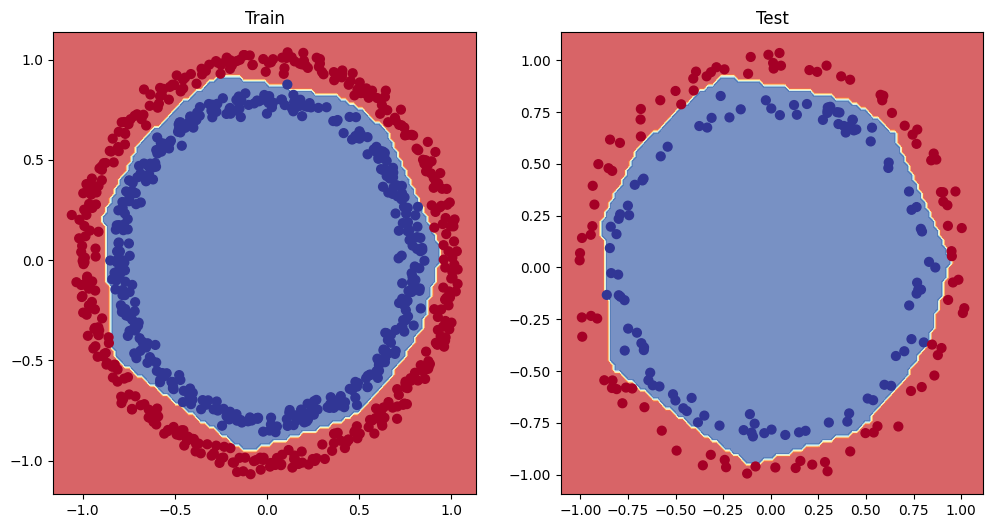

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2,X_test, y_test)

##Multiclass-classification model



###Creating a multi-class dataset

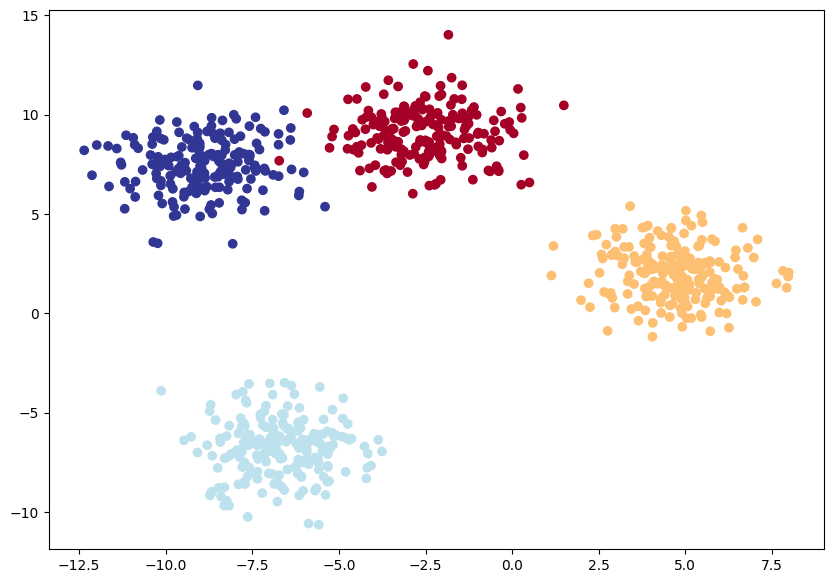

In [ ]:
# import dependencis
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn

#set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEDD = 42

# Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.3,
                            random_state=RANDOM_SEDD)

# Turn data into tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# Split set into train and test
X_blob, X_blob_test, y_blob, y_blob_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEDD)

# Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

###Creating a multi-class model

In [ ]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class MulticlassModel0(nn.Module):
  def __init__(self, input_features, output_features,hidden_features=8):
    super().__init__()
    self.sequential = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_features),
      nn.ReLU(),
      nn.Linear(in_features=hidden_features, out_features=hidden_features),
      nn.ReLU(),
      nn.Linear(in_features=hidden_features, out_features=output_features))

  def forward(self, x):
    return self.sequential(x)

model_4 = MulticlassModel0(input_features=NUM_FEATURES,
                           output_features=NUM_CLASSES).to(device)
model_4

MulticlassModel0(
  (sequential): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Loss func and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

###Setup pred probs and activation func


In [ ]:
# Raw outputs for the model (Logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]


tensor([[-0.7463, -0.7160, -1.5328, -1.1187],
        [-0.1001, -0.9496, -0.6023, -0.1385],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4399, -0.5321, -0.9746, -0.7255],
        [-0.2950, -1.3392, -1.1531, -0.3654],
        [-0.1452, -1.0515, -0.7005, -0.1619],
        [ 0.1851, -0.2713,  0.1816,  0.0103],
        [-0.2152, -1.1792, -0.9292, -0.2740],
        [ 0.2476, -0.2415,  0.1734,  0.0041],
        [-0.2295, -1.2061, -0.9734, -0.2945]], device='cuda:0')

In [ ]:
#activatio func
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[0.3149, 0.3246, 0.1434, 0.2170],
        [0.3339, 0.1428, 0.2021, 0.3213],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2806, 0.1803, 0.2313],
        [0.3693, 0.1300, 0.1566, 0.3442],
        [0.3377, 0.1364, 0.1938, 0.3321],
        [0.2882, 0.1826, 0.2872, 0.2420],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3007, 0.1844, 0.2792, 0.2357],
        [0.3586, 0.1350, 0.1704, 0.3360]], device='cuda:0')

###Creating the training and test loop

In [ ]:
# Creat manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Device agnostic code
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)
X_blob, y_blob = X_blob.to(device), y_blob.to(device)

#Change y_blob and y_blob_test to long data type
y_blob = y_blob.type(torch.long)
y_blob_test = y_blob_test.type(torch.long)

epochs = 100

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob)
  acc = accuracy_fn(y_true=y_blob,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.15586, Acc: 39.25% | Test loss: 1.07202, Test acc: 47.50%
Epoch: 10 | Loss: 0.63416, Acc: 98.00% | Test loss: 0.65060, Test acc: 98.00%
Epoch: 20 | Loss: 0.40911, Acc: 99.75% | Test loss: 0.41370, Test acc: 100.00%
Epoch: 30 | Loss: 0.23080, Acc: 99.88% | Test loss: 0.22282, Test acc: 100.00%
Epoch: 40 | Loss: 0.09259, Acc: 99.75% | Test loss: 0.08440, Test acc: 100.00%
Epoch: 50 | Loss: 0.04996, Acc: 99.75% | Test loss: 0.04427, Test acc: 100.00%
Epoch: 60 | Loss: 0.03534, Acc: 99.75% | Test loss: 0.02996, Test acc: 100.00%
Epoch: 70 | Loss: 0.02813, Acc: 99.75% | Test loss: 0.02279, Test acc: 100.00%
Epoch: 80 | Loss: 0.02400, Acc: 99.75% | Test loss: 0.01872, Test acc: 100.00%
Epoch: 90 | Loss: 0.02132, Acc: 99.75% | Test loss: 0.01604, Test acc: 100.00%


###Ploting results


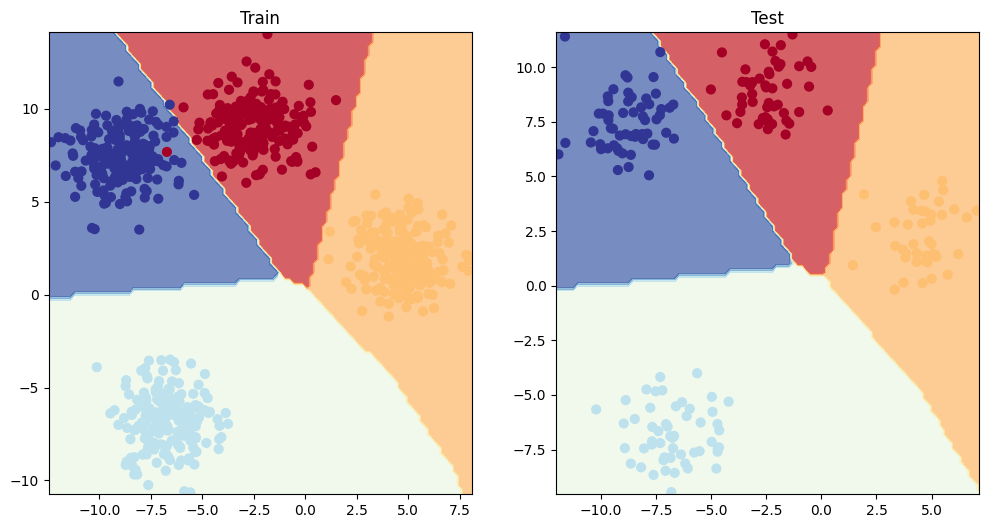

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob, y_blob)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test, y_blob_test)
